<h1>Quick Sort</h1>

In [1]:
def quicksort(L, first, last):
   
    i = first
    j = last    
    pivote = int((L[i] + L[j]) / 2)

    while i < j:
        while L[i] < pivote:
            i+=1
        while L[j] > pivote:
            j-=1
        if i <= j:
            x = L[j]
            L[j] = L[i]
            L[i] = x
            i+=1
            j-=1
        

    if first < j:
        quicksort(L, first, j)

    if last > i:
         quicksort(L, i, last)
   

In [2]:
L = [5,4,3,2,1]
quicksort(L,0,len(L)-1)
print (L)

[1, 2, 3, 4, 5]


<h2>Correctitud</h2>
<b>Invariante:</b> Teniendo un pivote p en el arreglo, siempre los números que estén a la izquierda deben ser menores y los que estén a la derecha deben ser mayores

In [68]:
def invariant(A,p, first,last):
    arr=list(A)
    i=first
    j=last
    cont=0
    tamtotal=last-first+1

    while arr[i]<=p:
        if i<=j:
            i+=1
            cont+=1
        if i>j:
            break
    if i<=j:
        while arr[i]>p:
            if i<=j:
                i+=1
                cont+=1
            if i>j:
                break
    if cont<tamtotal:
        return False

    return True

In [69]:
print (invariant([4,2,5,9,7], 6,0,4))
print (invariant([3,8,4,5,1], 6,0,4))

True
False


Algoritmo de quicksort incluyendo evaluación de la invariante

In [80]:
def right_quicksort (L, first, last):
    try:
        i = first
        j = last    
        pivote = int((L[i] + L[j]) / 2)

        while i < j:
            while L[i] < pivote:
                i+=1
            while L[j] > pivote:
                j-=1
            if i <= j:
                x = L[j]
                L[j] = L[i]
                L[i] = x
                i+=1
                j-=1
                
        assert invariant(L,pivote,first,last)
            
        if first < j:
            right_quicksort(L, first, j)

        if last > i:
             right_quicksort(L, i, last)
        assert invariant(L,pivote,first,last)
        
    except  AssertionError:
        print ("Error en el invariante de ciclo!")

In [81]:
L = [5, 4, 6, 3, 7, 2, 1, 9]
right_quicksort(L,0,len(L)-1)
print (L)

[1, 2, 3, 4, 5, 6, 7, 9]


In [100]:
def wrong_quicksort (L, first, last):
    original_A=list(L)
    try:
        i = first
        j = last    
        pivote = int((L[i] + L[j]) / 2)

        while i < j:
            while L[i] < pivote:
                i+=1
            while L[j] > pivote:
                j-=1
            if i <= j:
                i+=1
                j-=1
                
        assert invariant(L,pivote,first,last)
            
        if first < j:
            wrong_quicksort(L, first, j)

        if last > i:
             wrong_quicksort(L, i, last)
                
        assert invariant(L,pivote,first,last)
        
    except  AssertionError:
        print ("Error en el invariante de ciclo!")
        print ("i", i)
        print ("j",j)
        print ("Original: ",original_A[first:last+1])
        print ("L:",L[first:last+1])
        

In [101]:
L = [5, 4, 6, 3]
wrong_quicksort(L,0,len(L)-1)
print (L)

Error en el invariante de ciclo!
i 2
j 0
Original:  [5, 4, 6, 3]
L: [5, 4, 6, 3]
[5, 4, 6, 3]


<h2>Análisis del tiempo de ejecución</h2>

In [106]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)

def acct_quicksort(L, first, last,acct):
   
    i = first; acct.count()
    j = last  ; acct.count()  
    pivote = int((L[i] + L[j]) / 2); acct.count()
    acct.count()
    while i < j:
        acct.count()
        while L[i] < pivote:
            acct.count()
            i+=1; acct.count()
        acct.count()
        while L[j] > pivote:
            acct.count()
            j-=1; acct.count()
        if i <= j:
            acct.count()
            x = L[j]; acct.count()
            L[j] = L[i]; acct.count()
            L[i] = x; acct.count()
            i+=1; acct.count()
            j-=1; acct.count()
        

    if first < j:
        acct.count()
        acct_quicksort(L, first, j,acct); acct.count()

    if last > i:
        acct.count()
        acct_quicksort(L, i, last,acct); acct.count()
    

In [111]:
import numpy as np
B = np.random.permutation(range(0,10))
acct = Counter()
acct_quicksort(B, 0,len(B)-1,acct)
acct.print_steps()

Number of steps = 186


<b>Análisis experimental</b><br>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_quicksort(B, 0,len(B)-1,acct) y contabiliza el número de pasos. 

In [112]:
import random

def exper_analysis(n):
    results = [0]
    acct = Counter()
    for i in range(n):
        if i>0:
            l = list(range(i))
            random.shuffle(l)
            acct.reset()
            acct_quicksort(l,0,len(l)-1, acct)
            results.append(acct.steps)
    return results

In [113]:
print (exper_analysis(10))

[0, 4, 14, 30, 48, 82, 108, 110, 108, 140]


Ahora vamos a analizar el tiempo del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_quicksort(l,0,len(l)-1, acct) y saca el tiempo que se demora el algoritmo.

In [114]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis(n):
    results = [0]
    acct = Counter()
    for i in range(n):
        if i>0:
            l = list(range(i))
            random.shuffle(l)
            acct.reset()
            tic = time.clock()
            acct_quicksort(l,0,len(l)-1, acct)
            toc = time.clock()
            results.append((toc-tic))
    return results

La siguiente gráfica representa el número de operaciones (azul), tiempo (rojo) y T(n) (negro) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.

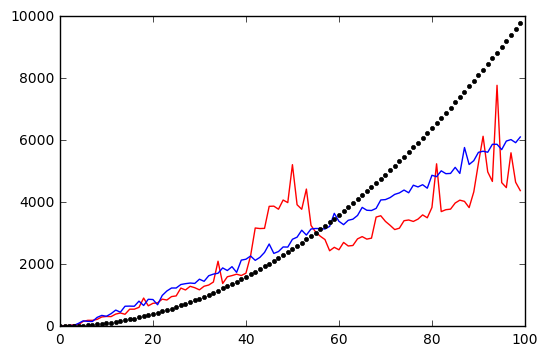

In [119]:
import pylab 
import math
pylab.clf()
x = np.arange(100)
y = np.array(timer_analysis(100))*5000000

a = np.arange(100)
b = np.array(exper_analysis(100))*2

c = np.arange(100)
d = (c*c)

pylab.plot(x, y, 'r-',a,b,'b-',c,d,'k.')
pylab.show()